# Imports

In [87]:
import yfinance as yf
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import (MultipleLocator)
%matplotlib inline

# Data preperation

In [77]:
data = yf.download('EURUSD=X', period='31d', interval='1d')
data['SMA'] = data['Close'].rolling(2).mean()
data['STD'] = data['Close'].rolling(2).std()

data['Upper'] = data['SMA'] + (data['STD'] * 2)
data['Lower'] = data['SMA'] - (data['STD'] * 2)
data.dropna(inplace=True)


# Plotting the data

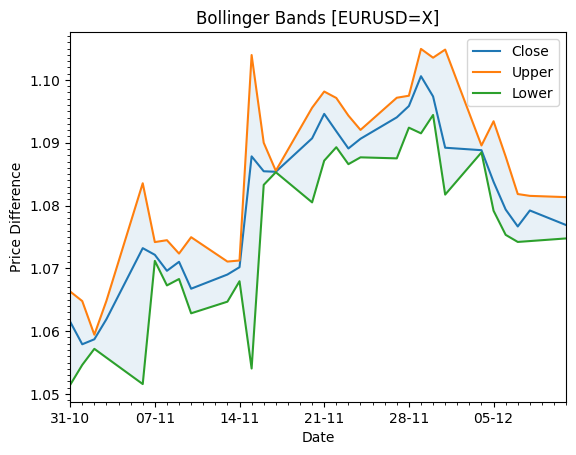

In [86]:
fig, ax = plt.subplots()

ax.plot(data['Close'], label='Close')

ax.plot(data['Upper'], label='Upper')

ax.plot(data['Lower'], label='Lower')

ax.fill_between(data.index, data['Lower'], data['Upper'], alpha=0.1)

ax.set(title='Bollinger Bands [EURUSD=X]', ylabel='Price Difference', xlabel='Date')

ax.set_xlim(data.index[0], data.index[-1])
ax.xaxis.set_minor_locator(mdates.DayLocator(interval=1))
ax.xaxis.set_major_locator(mdates.DayLocator(interval=7))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m'))

ax.yaxis.set_minor_locator(MultipleLocator(0.001))
ax.legend()

plt.show()